In [140]:
import pandas as pd

Carregando os dados de um dataset

In [141]:
df = pd.read_excel("./Latrocinio_2018_2022.xlsx")
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,LATRO,Nº DE VIT EM LATRO,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA
0,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,1,10342,2018,1,2018-01-21,...,1572.0,-23.562435,-46.645048,Vítima,Masculino,59.0,1958-02-18,Branca,JORNALISTA,LATROCÍNIO
1,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,200100,2018,1,2018-01-20,...,11.0,23.634218,-46.742773,Autor/Vitima,Masculino,27.0,1990-07-02,Branca,POLICIAL MILITAR,LATROCÍNIO
2,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,10356,2018,1,2018-01-11,...,62.0,-23.624715,-46.757891,Vítima,Masculino,59.0,1958-08-09,Branca,NAO INFORMADA,LATROCÍNIO
3,DECAP,6ª SEC,São Paulo,092 DP - Parque Santo Antônio,1.0,1,10247,2018,1,2018-01-14,...,65.0,-23.660457,-46.758769,Vítima,Masculino,30.0,1987-03-12,Parda,GARÇON(ETE),LATROCÍNIO
4,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1.0,1,10309,2018,1,2018-01-30,...,189.0,-23.631998,-46.465942,Vítima,Masculino,68.0,1949-11-12,Parda,APOSENTADO(A),LATROCÍNIO


Analisando a qtd de amostras

In [142]:
df.shape

(278, 30)

Removendo dados duplicados

In [143]:
latrocinio_df = df.drop_duplicates()

Não haviam dados duplicados, por isso continuou com a mesma qtd de amostras

In [144]:
latrocinio_df.shape

(278, 30)

Filtrando os dados para latrocínios que aconteceram na cidade de São Paulo

In [145]:
latrocinio_df = latrocinio_df[latrocinio_df['MUNICIPIO_CIRCUNSCRICAO']=="São Paulo"]

Restaram 82 amostras

In [146]:
latrocinio_df.shape

(82, 30)

Transformando tipos de dados e retirando NaN

In [147]:
latrocinio_df.dtypes

DEPARTAMENTO_CIRCUNSCRICAO            object
SECCIONAL_CIRCUNSCRICAO               object
MUNICIPIO_CIRCUNSCRICAO               object
DP_CIRCUNSCRICAO                      object
LATRO                                float64
Nº DE VIT EM LATRO                     int64
ID_DELEGACIA                           int64
MÊS ESTATISTICA                        int64
ANO ESTATISTICA                        int64
DATAHORA_REGISTRO_BO          datetime64[ns]
NUM_BO                                 int64
ANO_BO                                 int64
MUNICIPIO_ELABORACAO                  object
DP_ELABORACAO                         object
SEC_ELABORACAO                        object
DEP_ELABORACAO                        object
DATA_FATO                     datetime64[ns]
HORA_FATO                             object
DESC_TIPOLOCAL                        object
LOGRADOURO                            object
NUMERO_LOGRADOURO                    float64
LATITUDE                             float64
LONGITUDE 

In [148]:
# get a boolean mask indicating which values are NaN
mask = latrocinio_df.isna()

# get a boolean mask indicating which columns have at least one NaN value
has_nan = mask.any(axis=0)

# get the column names that have at least one NaN value
columns_with_nan = latrocinio_df.columns[has_nan]
columns_with_nan

Index(['LATRO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'PROFISSAO'],
      dtype='object')

In [149]:
latrocinio_df['NUMERO_LOGRADOURO'] = latrocinio_df['NUMERO_LOGRADOURO'].fillna(-1)
latrocinio_df['IDADE_PESSOA'] = latrocinio_df['IDADE_PESSOA'].fillna(-1)
latrocinio_df['NUMERO_LOGRADOURO'] = latrocinio_df['NUMERO_LOGRADOURO'].astype(float).astype(int)
latrocinio_df['IDADE_PESSOA'] = latrocinio_df['IDADE_PESSOA'].astype(float).astype(int)

In [150]:
latrocinio_df.dtypes

DEPARTAMENTO_CIRCUNSCRICAO            object
SECCIONAL_CIRCUNSCRICAO               object
MUNICIPIO_CIRCUNSCRICAO               object
DP_CIRCUNSCRICAO                      object
LATRO                                float64
Nº DE VIT EM LATRO                     int64
ID_DELEGACIA                           int64
MÊS ESTATISTICA                        int64
ANO ESTATISTICA                        int64
DATAHORA_REGISTRO_BO          datetime64[ns]
NUM_BO                                 int64
ANO_BO                                 int64
MUNICIPIO_ELABORACAO                  object
DP_ELABORACAO                         object
SEC_ELABORACAO                        object
DEP_ELABORACAO                        object
DATA_FATO                     datetime64[ns]
HORA_FATO                             object
DESC_TIPOLOCAL                        object
LOGRADOURO                            object
NUMERO_LOGRADOURO                      int32
LATITUDE                             float64
LONGITUDE 

In [151]:
latrocinio_df['HORA_FATO'] = latrocinio_df['HORA_FATO'].fillna("nao-info")

Transformando todas as strings do dataset para lowercase

In [152]:
columns = latrocinio_df.columns
types = latrocinio_df.dtypes
for col in columns:
    if types[col]=='O':
        latrocinio_df[col] = latrocinio_df[col].str.lower()
        latrocinio_df[col] = latrocinio_df[col].str.strip()



Verificando quais são as colunas existentes, para relacionar estatísticas interessantes

In [153]:
latrocinio_df.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'LATRO',
       'Nº DE VIT EM LATRO', 'ID_DELEGACIA', 'MÊS ESTATISTICA',
       'ANO ESTATISTICA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO',
       'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO',
       'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA',
       'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

Renomear colunas que estão com nomes trocados

In [154]:
latrocinio_df = latrocinio_df.rename(columns={'ANO ESTATISTICA': 'MÊS ESTATISTICA', 'MÊS ESTATISTICA':'ANO ESTATISTICA'})

In [155]:
latrocinio_df['SEXO_PESSOA'].value_counts()

masculino    76
feminino      6
Name: SEXO_PESSOA, dtype: int64

In [156]:
latrocinio_df['TIPO_PESSOA'].value_counts()

vítima          80
autor/vitima     2
Name: TIPO_PESSOA, dtype: int64

In [157]:
latrocinio_df['COR_PELE'].value_counts()

branca           54
parda            17
amarela           5
preta             4
não informada     2
Name: COR_PELE, dtype: int64

Vamos analisar os locais que mais ocorre latrocínio

Pegamos a qtd de latrocinio em cada local

In [167]:
latrocinio_df['DESC_TIPOLOCAL'].value_counts()

via pública            56
residência             16
comércio e serviços     5
saúde                   2
carro forte             1
restaurante e afins     1
terminal/estação        1
Name: DESC_TIPOLOCAL, dtype: int64

Importando a biblioteca matplotlib para plotar o gráfico

In [159]:
import matplotlib.pyplot as plt

In [160]:
qtd_valores = latrocinio_df['DESC_TIPOLOCAL'].value_counts()
qtd = qtd_valores.values
tipo = qtd_valores.index

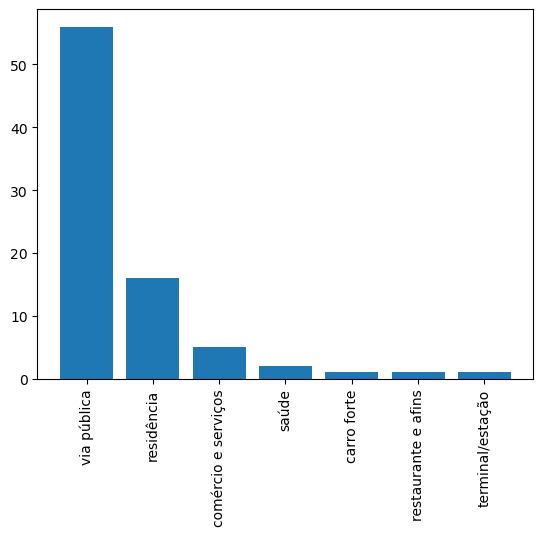

In [161]:
plt.bar(tipo, qtd)
plt.xticks(rotation=90)
plt.show()

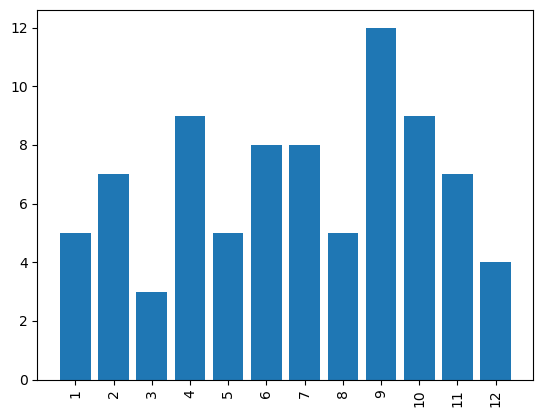

In [162]:
fig, ax = plt.subplots()
qtd_valores = latrocinio_df['MÊS ESTATISTICA'].value_counts()
qtd = qtd_valores.values
tipo = qtd_valores.index
ax.bar(tipo, qtd)
ax.set_xticks(tipo)
plt.xticks(rotation=90)
plt.show()

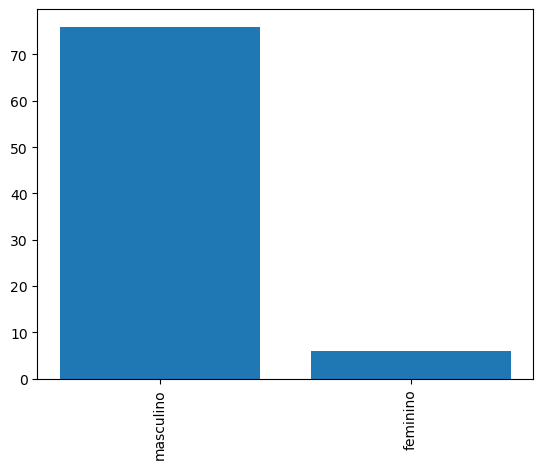

In [163]:
fig, ax = plt.subplots()
qtd_valores = latrocinio_df['SEXO_PESSOA'].value_counts()
qtd = qtd_valores.values
tipo = qtd_valores.index
ax.bar(tipo, qtd)
ax.set_xticks(tipo)
plt.xticks(rotation=90)
plt.show()

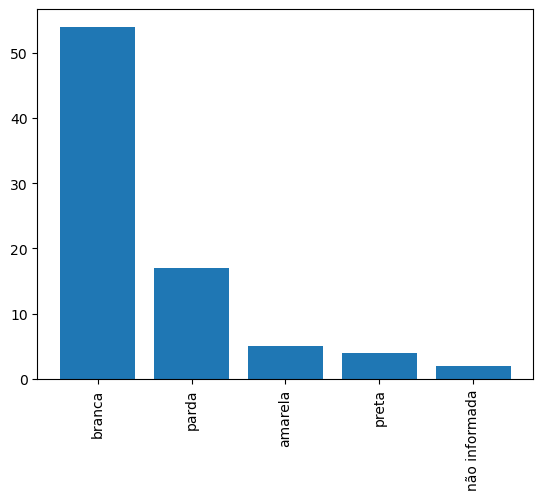

In [164]:
fig, ax = plt.subplots()
qtd_valores = latrocinio_df['COR_PELE'].value_counts()
qtd = qtd_valores.values
tipo = qtd_valores.index
ax.bar(tipo, qtd)
ax.set_xticks(tipo)
plt.xticks(rotation=90)
plt.show()

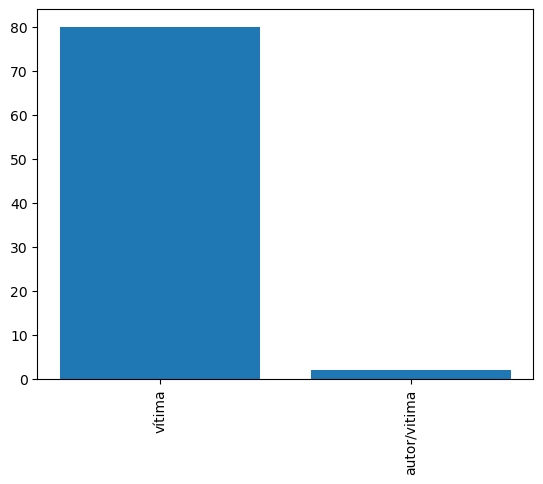

In [168]:
fig, ax = plt.subplots()
qtd_valores = latrocinio_df['TIPO_PESSOA'].value_counts()
qtd = qtd_valores.values
tipo = qtd_valores.index
ax.bar(tipo, qtd)
ax.set_xticks(tipo)
plt.xticks(rotation=90)
plt.show()